In [4]:
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize

In [ ]:
img_path = "C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train/panda/253.jpeg"
img = imread(img_path)
img


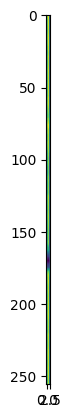

In [12]:
import matplotlib.pyplot as plt
myimg = img[1]
plt.imshow(myimg)

In [29]:
img.shape

(256, 256, 3)

In [30]:
img_resize = resize(img, (15,15))
img_resize.shape

(15, 15, 3)

In [ ]:
#flatten the matrix
flatten_img = img_resize.flatten()
flatten_img

In [32]:
flatten_img.shape

(675,)

In [ ]:
# read training imgs, convert into matrix store it into the list

train_dir = "C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train"
cl = ["panda", "not_panda"]

data = []
labels = []

for cl_indx, cl in enumerate(cl):
    for file in os.listdir(os.path.join(train_dir, cl)):
        img_path = os.path.join(train_dir, cl, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(cl_indx)

In [41]:
data = np.asarray(data)
labels = np.asarray(labels)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [49]:
from sklearn.svm import SVC
svm_model = SVC()

In [50]:
svm_model.fit(x_train, y_train)

SVC()

In [51]:
y_pred = svm_model.predict(x_test)

In [52]:
#model evaluation

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.7540983606557377

In [ ]:
import joblib

# Save the model to a file
model_filename = "svm_model.pkl"
joblib.dump(svm_model, model_filename)
